In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

!date
!whoami
!pwd

Wed Feb  9 23:10:51 PST 2022
ndbs
/Users/ndbs/notebooks


In [3]:
a = np.array([10, 9.2, 7.5, 6.1, 4, 3, 1])
a

array([10. ,  9.2,  7.5,  6.1,  4. ,  3. ,  1. ])

In [9]:
def diffs(x):
    return x[1:]-x[:-1]

def mean_diff1(x):
    # Makes a telescoping sum, simplifying to mean_diffs2 below
    return diffs(x).mean()

def mean_diff2(x):
    return (x[-1]-x[0])/(len(x)-1)

diffs(a)

array([-0.8, -1.7, -1.4, -2.1, -1. , -2. ])

In [6]:
# equals (a[-1]-a[0])/(len(a)-1)
diffs(a).mean()

-1.5

In [12]:
len(a)

7

In [8]:
(10-1)/6

1.5

In [13]:
mean_diff1(a) == mean_diff2(a)

True

In [28]:
def get_slopes(x, y):
    n = len(x)
    if len(y) != n:
        raise ValueError("arrays must have same length")
    slopes = np.empty(n*(n-1)//2)
#     indices = []
    for i in range(n):
        for j in range(i+1, n):
#             index = i+j*(j-1)//2
#             indices.append(index)
#             print(index)
            slopes[i+j*(j-1)//2] = (y[j]-y[i])/(x[j]-x[i])
    return slopes#, indices

s = get_slopes(a, 2*a)
s

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2.])

In [26]:
sorted(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [30]:
s = get_slopes(a, np.exp(a))
s

array([1.51616709e+04, 8.08736935e+03, 4.75828626e+03, 5.53348924e+03,
       3.04879719e+03, 9.72989032e+02, 3.66197794e+03, 1.89279441e+03,
       5.00984076e+02, 1.86314105e+02, 3.14376861e+03, 1.59307154e+03,
       3.97323751e+02, 1.37345882e+02, 3.45126131e+01, 2.44708306e+03,
       1.20663546e+03, 2.77742174e+02, 8.68900957e+01, 1.72932894e+01,
       8.68362755e+00])

In [31]:
s.mean()

2531.191552991779

In [32]:
mean_diff2(np.exp(a))

-3670.6245854963763

In [36]:
s = get_slopes(np.arange(len(a)), a)
s

array([-0.8       , -1.25      , -1.7       , -1.3       , -1.55      ,
       -1.4       , -1.5       , -1.73333333, -1.75      , -2.1       ,
       -1.4       , -1.55      , -1.5       , -1.55      , -1.        ,
       -1.5       , -1.64      , -1.625     , -1.7       , -1.5       ,
       -2.        ])

In [37]:
s.mean()

-1.526111111111111

In [40]:
np.median(s)

-1.5499999999999998

In [96]:
def regression_slope(x,y):
    xmean, ymean = x.mean(), y.mean()
    beta = ((x-xmean)*(y-ymean)).sum()/((x-xmean)**2).sum()
    return beta

def regression_slope_sm(x,y):
    data = pd.DataFrame({'x':x, 'y':y})
    regression = smf.ols("y~x", data=data).fit()
    return regression.params['x']

def aarr(x,y):
    return 1-np.exp(regression_slope(x,np.log(y)))

def aarr_sm(x,y):
    data = pd.DataFrame({'x':x, 'y':y})
    regression = smf.ols("np.log(y)~x", data=data).fit()
    beta = regression.params['x']
    return 1-np.exp(beta)

def aarr_mean_slope(x,y):
    slopes = get_slopes(x,np.log(y))
    return 1-np.exp(slopes.mean())

def aarr_median_slope(x,y):
    slopes = get_slopes(x,np.log(y))
    return 1-np.exp(np.median(slopes))

x = np.arange(len(a))
%time print(f"{regression_slope(x, a)=}")
%time print(f"{regression_slope_sm(x, a)=}")
%time print(f"{aarr(x,a)=}")
%time print(f"{aarr_sm(x,a)=}")
%time print(f"{aarr_mean_slope(x,a)=}")
%time print(f"{aarr_median_slope(x,a)=}")

regression_slope(x, a)=-1.5321428571428573
CPU times: user 317 µs, sys: 110 µs, total: 427 µs
Wall time: 336 µs
regression_slope_sm(x, a)=-1.532142857142858
CPU times: user 133 ms, sys: 2.9 ms, total: 136 ms
Wall time: 135 ms
aarr(x,a)=0.2947465824101001
CPU times: user 507 µs, sys: 515 µs, total: 1.02 ms
Wall time: 674 µs
aarr_sm(x,a)=0.2947465824101003
CPU times: user 7.6 ms, sys: 682 µs, total: 8.28 ms
Wall time: 7.94 ms
aarr_mean_slope(x,a)=0.2985297940213206
CPU times: user 107 µs, sys: 19 µs, total: 126 µs
Wall time: 118 µs
aarr_median_slope(x,a)=0.2499999999999999
CPU times: user 295 µs, sys: 78 µs, total: 373 µs
Wall time: 356 µs


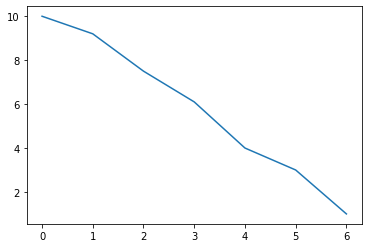

In [42]:
x = np.arange(len(a))
plt.plot(x,a)

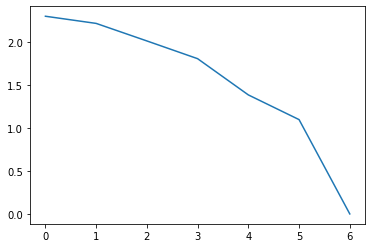

In [43]:
plt.plot(x,np.log(a))

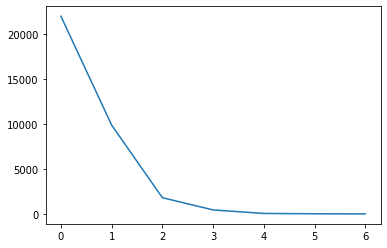

In [88]:
plt.plot(x, np.exp(a))

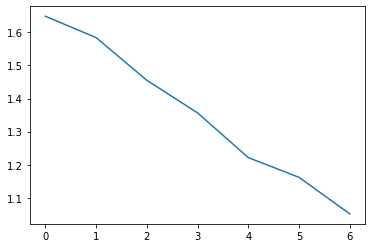

In [89]:
plt.plot(x, np.exp(a/20))

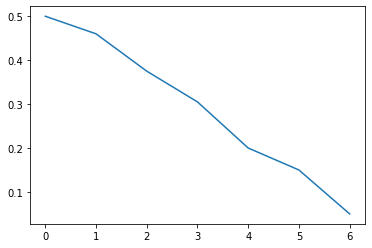

In [83]:
y = np.exp(a/12)
plt.plot(x, np.log(y))

In [84]:
slopes = get_slopes(x, np.log(y))
beta = regression_slope(x, np.log(y))
print(f"{beta=}, {slopes.mean()=}, {np.median(slopes)=}")

beta=-0.07660714285714285, slopes.mean()=-0.07630555555555556, np.median(slopes)=-0.07749999999999999


In [85]:
1-np.exp(beta)

0.0737463324922506

In [86]:
1-np.exp(slopes.mean())

0.0734669440201916

In [87]:
1-np.exp(np.median(slopes))

0.07457297560336307

In [98]:
np.array([1,2,3]) /np.array([2,0,4])

<ipython-input-98-07200fdca0b0>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.array([1,2,3]) /np.array([2,0,4])


array([0.5 ,  inf, 0.75])